In [1]:
import requests
import pandas as pandas
from urllib.request import urlopen
import urllib
import numpy as numpy

# 1. Import and store the data in a data frame

Approach Taken:

1. Loaded the data from URL using "requests" package
2. Parsed the data and appended into an empty list "DF"
3. from "DF" remove html strings like "b'" and "\\r\\n'"
4. extract all 11 required variables and store it in an individual lists/array with appropriate data type
5. Create data frame "Source" using the extracted lists

In [2]:
Source = requests.get("http://users.stat.ufl.edu/winner/data/airq402.dat")

In [19]:
DF = []
content1=urllib.request.urlopen("http://www.stat.ufl.edu/~winner/data/airq402.dat")
for word in content1:
    DF.append(word)

In [20]:
len(DF)

1000

In [21]:
Source = []
City1 = []
City2 = []
Average_Fare = []
Distance = []
Average_weekly_passengers=[]
market_leading_airline = []
market_share = []
Average_fare2 = []
Low_price_airline = []
market_share2 = []
price = []
for i in range(0,1000):
    b = (str(pandas.Series(DF)[i])).replace("\\r\\n'","")
    b = (str(b)).replace("b'","")
    a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11 = b[0:3],b[4:7],float(b[10:17]),float(b[19:23]),float(b[25:33]),b[35:37],float(b[39:45]),float(b[47:54]),(b[56:58]), float(b[60:66]), float(b[68:75]) 
    City1.append(a1)
    City2.append(a2)
    Average_Fare.append(a3)
    Distance.append(a4)
    Average_weekly_passengers.append(a5)
    market_leading_airline.append(a6)
    market_share.append(a7)
    Average_fare2.append(a8)
    Low_price_airline.append(a9)
    market_share2.append(a10)
    price.append(a11)

In [22]:
Source = pandas.DataFrame({"City1":City1, "City2":City2,"Average_Fare":Average_Fare,"Distance" : Distance,
                           "Average_weekly_passengers":Average_weekly_passengers, 
                           "Market_Leading_Airline" : market_leading_airline,
                           "Market_Share" : market_share, "Average_Fare2":Average_fare2, 
                           "Low_price_airline" : Low_price_airline, 
                           "Market_Share2" : market_share2, "Price" : price})

In [23]:
Source.head()

,Average_Fare,Average_Fare2,Average_weekly_passengers,City1,City2,Distance,Low_price_airline,Market_Leading_Airline,Market_Share,Market_Share2,Price
0,114.47,111.03,424.56,CAK,ATL,528.0,FL,FL,70.19,70.19,111.03
1,122.47,123.09,276.84,CAK,MCO,860.0,DL,FL,75.10,17.23,118.94
2,214.42,223.98,215.76,ALB,ATL,852.0,CO,DL,78.89,2.77,167.12
3,69.40,68.86,606.84,ALB,BWI,288.0,WN,WN,96.97,96.97,68.86
4,158.13,161.36,313.04,ALB,ORD,723.0,WN,UA,39.79,15.34,145.42


# 2. Remove the outliers from the data

Approach Taken

1. Using describe() function, 5 point summary determined and the output saved in a dataframe
2. Index reset performed and only indices 4 to 6 were subset which consists Q1 and Q3 values
3. IQR calculated 
4. Outliers in data set calculated using formula Q3+1.5*IQR and Q1-1.5*IQR 
5. Rows with outliers removed

In total 115 records were removed

In [24]:
No_of_records_before_outlier_removal = len(Source)

In [25]:
Describe = (Source.describe()).reset_index().loc[4:6]

In [26]:
Describe

,index,Average_Fare,Average_Fare2,Average_weekly_passengers,Distance,Market_Share,Market_Share2,Price
4,25%,125.9750,124.0850,257.1975,553.5,46.51,13.1950,113.7675
5,50%,161.3450,161.4000,404.7800,919.0,59.24,26.1400,137.8250
6,75%,197.3925,202.9775,769.9125,1452.5,73.51,52.9725,168.5300


In [27]:
del Describe["index"]

In [28]:
IQR = Describe.loc[6] - Describe.loc[4]
IQR

Average_Fare                  71.4175
Average_Fare2                 78.8925
Average_weekly_passengers    512.7150
Distance                     899.0000
Market_Share                  27.0000
Market_Share2                 39.7775
Price                         54.7625
dtype: float64

In [29]:
Subset = Source[["Average_Fare","Average_Fare2","Average_weekly_passengers","Distance", "Market_Share","Market_Share2","Price"]]

In [30]:
Subset.head()

,Average_Fare,Average_Fare2,Average_weekly_passengers,Distance,Market_Share,Market_Share2,Price
0,114.47,111.03,424.56,528.0,70.19,70.19,111.03
1,122.47,123.09,276.84,860.0,75.10,17.23,118.94
2,214.42,223.98,215.76,852.0,78.89,2.77,167.12
3,69.40,68.86,606.84,288.0,96.97,96.97,68.86
4,158.13,161.36,313.04,723.0,39.79,15.34,145.42


In [31]:
a = Subset > Subset.quantile(0.75) + (1.5 * IQR)
b = Subset < Subset.quantile(0.25) - (1.5 * IQR)
Source[["Q31","Q32","Q33","Q34","Q35","Q36","Q37"]] = a
Source[["Q11","Q12","Q13","Q14","Q15","Q16","Q17"]] = b

In [32]:
Source.head()

,Average_Fare,Average_Fare2,Average_weekly_passengers,City1,City2,Distance,Low_price_airline,Market_Leading_Airline,Market_Share,Market_Share2,...,Q35,Q36,Q37,Q11,Q12,Q13,Q14,Q15,Q16,Q17
0,114.47,111.03,424.56,CAK,ATL,528.0,FL,FL,70.19,70.19,...,False,False,False,False,False,False,False,False,False,False
1,122.47,123.09,276.84,CAK,MCO,860.0,DL,FL,75.10,17.23,...,False,False,False,False,False,False,False,False,False,False
2,214.42,223.98,215.76,ALB,ATL,852.0,CO,DL,78.89,2.77,...,False,False,False,False,False,False,False,False,False,False
3,69.40,68.86,606.84,ALB,BWI,288.0,WN,WN,96.97,96.97,...,False,False,False,False,False,False,False,False,False,False
4,158.13,161.36,313.04,ALB,ORD,723.0,WN,UA,39.79,15.34,...,False,False,False,False,False,False,False,False,False,False


In [33]:
Source = Source[Source["Q31"] != True]
Source = Source[Source["Q32"] != True]
Source = Source[Source["Q33"] != True]
Source = Source[Source["Q34"] != True]
Source = Source[Source["Q35"] != True]
Source = Source[Source["Q36"] != True]
Source = Source[Source["Q37"] != True]
Source = Source[Source["Q11"] != True]
Source = Source[Source["Q12"] != True]
Source = Source[Source["Q13"] != True]
Source = Source[Source["Q14"] != True]
Source = Source[Source["Q15"] != True]
Source = Source[Source["Q16"] != True]
Source = Source[Source["Q17"] != True]

In [34]:
No_of_records_before_post_removal = len(Source)

In [35]:
Record_Removed = No_of_records_before_outlier_removal - No_of_records_before_post_removal

In [36]:
Record_Removed

115

In [37]:
Source = (Source.iloc[:,0:11])

In [38]:
Source.head()

,Average_Fare,Average_Fare2,Average_weekly_passengers,City1,City2,Distance,Low_price_airline,Market_Leading_Airline,Market_Share,Market_Share2,Price
0,114.47,111.03,424.56,CAK,ATL,528.0,FL,FL,70.19,70.19,111.03
1,122.47,123.09,276.84,CAK,MCO,860.0,DL,FL,75.10,17.23,118.94
2,214.42,223.98,215.76,ALB,ATL,852.0,CO,DL,78.89,2.77,167.12
3,69.40,68.86,606.84,ALB,BWI,288.0,WN,WN,96.97,96.97,68.86
4,158.13,161.36,313.04,ALB,ORD,723.0,WN,UA,39.79,15.34,145.42


# 3. Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable. (2.5 points)

In [39]:
Y = pandas.DataFrame(Source["Average_Fare"])

In [40]:
X = Source.iloc[:,1:11]

In [41]:
Y.columns

Index(['Average_Fare'], dtype='object')

In [42]:
len(Y)

885

In [43]:
X.columns

Index(['Average_Fare2', 'Average_weekly_passengers', 'City1', 'City2',
       'Distance', 'Low_price_airline', 'Market_Leading_Airline',
       'Market_Share', 'Market_Share2', 'Price'],
      dtype='object')

In [44]:
len(X)

885

# 4. Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)

In [45]:
Source.corr()

,Average_Fare,Average_Fare2,Average_weekly_passengers,Distance,Market_Share,Market_Share2,Price
Average_Fare,1.000000,0.979713,-0.197005,0.522650,-0.207955,-0.493555,0.840993
Average_Fare2,0.979713,1.000000,-0.163736,0.489721,-0.193382,-0.519442,0.794157
Average_weekly_passengers,-0.197005,-0.163736,1.000000,-0.129632,0.021769,0.076176,-0.209018
Distance,0.522650,0.489721,-0.129632,1.000000,-0.547952,-0.361519,0.539894
Market_Share,-0.207955,-0.193382,0.021769,-0.547952,1.000000,0.281182,-0.314555
Market_Share2,-0.493555,-0.519442,0.076176,-0.361519,0.281182,1.000000,-0.260912
Price,0.840993,0.794157,-0.209018,0.539894,-0.314555,-0.260912,1.000000


Dependent Variable = Average_Fare
Independent Variables < 0.1 Correlation are
1. Average_weekly_passengers
2. Market_Share
3. Market_Share2

Removing these variables from X

In [46]:
X = X.drop(["Average_weekly_passengers","Market_Share","Market_Share2"],axis = 1)

In [47]:
X.head()

,Average_Fare2,City1,City2,Distance,Low_price_airline,Market_Leading_Airline,Price
0,111.03,CAK,ATL,528.0,FL,FL,111.03
1,123.09,CAK,MCO,860.0,DL,FL,118.94
2,223.98,ALB,ATL,852.0,CO,DL,167.12
3,68.86,ALB,BWI,288.0,WN,WN,68.86
4,161.36,ALB,ORD,723.0,WN,UA,145.42


# 5. Create scatter Plot of Independent Variable vs Dependent Variable. (2.5 points)

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_palette("BrBG")
sns.set_style('whitegrid')

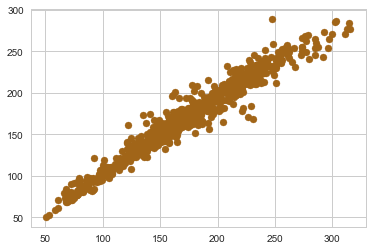

In [49]:
plt.scatter(X["Average_Fare2"],Y["Average_Fare"])

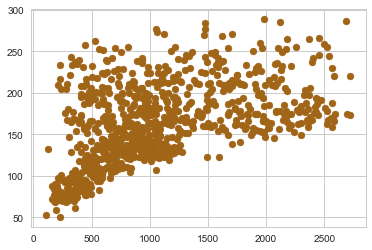

In [50]:
plt.scatter(X["Distance"],Y["Average_Fare"])

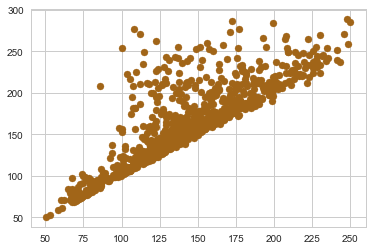

In [51]:
plt.scatter(X["Price"],Y["Average_Fare"])

Inference :
    Average Fare and Price, Distance has a strong postive correlation. This is evident in Correlation matrix as well

<BarContainer object of 885 artists>

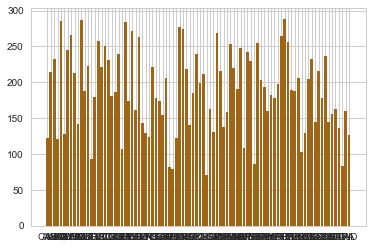

In [52]:
plt.bar(X["City1"],Y["Average_Fare"])

<BarContainer object of 885 artists>

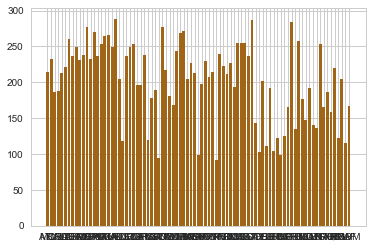

In [53]:
plt.bar(X["City2"],Y["Average_Fare"])

<BarContainer object of 885 artists>

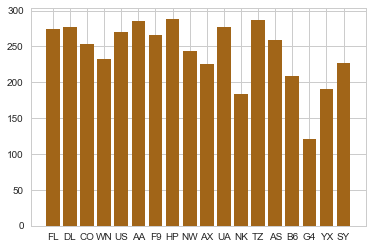

In [54]:
plt.bar(X["Low_price_airline"],Y["Average_Fare"])

<BarContainer object of 885 artists>

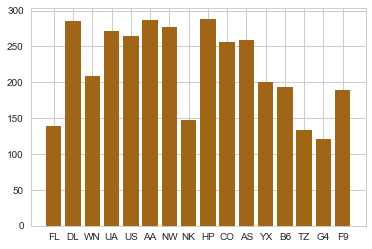

In [55]:
plt.bar(X["Market_Leading_Airline"],Y["Average_Fare"])

# 6 . Divide the data set into training and test data set and build a Multiple Linear Regression model. (5 points)

In [56]:
City1_dummies = pandas.get_dummies(X["City1"])
City2_dummies = pandas.get_dummies(X["City2"])
Market_Leading_Airline_dummies = pandas.get_dummies(X["Market_Leading_Airline"])
Low_price_airline_dummies = pandas.get_dummies(X["Low_price_airline"])

In [57]:
City2_dummies.columns = City2_dummies.columns.str.lower()
Low_price_airline_dummies.columns = Low_price_airline_dummies.columns.str.lower()

In [58]:
X = X.join([City1_dummies,City2_dummies,Market_Leading_Airline_dummies,Low_price_airline_dummies])

In [59]:
del X["City1"]
del X["City2"]
del X["Low_price_airline"]
del X["Market_Leading_Airline"]

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
lm = LinearRegression()

In [63]:
lm.fit(X_train[["Distance","Price","Average_Fare2"]],Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# 7. Print the coefficients & intercepts of the linear regression model (5 points)

In [64]:
print('Coefficients: \n ', lm.coef_)

Coefficients: 
  [[0.00198613 0.20380978 0.75632333]]


In [65]:
print('Coefficients: \n ', lm.intercept_)

Coefficients: 
  [6.72922679]


# 8. Print the accuracy of the overall model (2.5 points)

In [66]:
predictions = lm.predict(X_test[["Distance","Price","Average_Fare2"]])

Text(0,0.5,'Predicted Y')

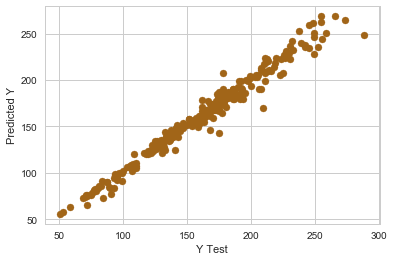

In [67]:
plt.scatter(Y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [68]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', numpy.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 5.288154680751782
MSE: 59.741318951286225
RMSE: 7.729250866111555


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


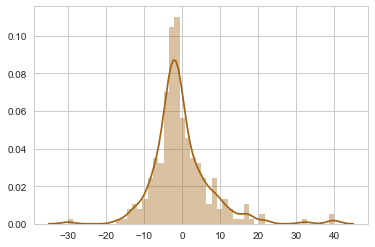

In [69]:
sns.distplot((Y_test-predictions),bins=50);

In [70]:
r_squared = metrics.r2_score(Y_test,predictions)
r_squared

0.974409205544432